In [1]:
import pandas as pd  # For displaying the data after
import matplotlib.pyplot as plt  # for plotting data
from src.twitter_util import TwitterApiGetter
from src.persistance_util import export_container_to_csv

In [2]:
twg = TwitterApiGetter()
minister_bios = twg.get_all_minister_twitter_bios(
    custom_user_fields=[
        "created_at",
        "description",
        "id",
        "location",
        "name",
        "public_metrics",
        "url",
        "username",
        "verified",
    ],
)
export_container_to_csv(container=minister_bios, path="data/minister_bios.csv")

INFO: 13/13 Twitter accounts of ministers with Twitter handles fetched.


In [3]:
minister_df = pd.read_csv("data/minister_bios.csv")
minister_df.head()

,name,created_at,verified,id,username,url,description,location,followers_count,following_count,tweet_count,listed_count,party
0,Volker Wissing,2009-02-11T14:34:58.000Z,True,20593301,Wissing,https://t.co/QyGCyDDccr,"Bundesminister für Digitales und Verkehr, Vors...","Schillerstraße 11a, 55116 Mainz",31291,998,13162,621,fdp
1,Christian Lindner,2010-03-11T16:11:51.000Z,True,122104353,c_lindner,https://t.co/mJgVJTabCr,Bundesminister der Finanzen. Bundesvorsitzende...,"Berlin, Deutschland",550078,1371,17689,2408,fdp
2,Prof. Karl Lauterbach,2015-05-21T14:01:21.000Z,True,3292982985,Karl_Lauterbach,https://t.co/aNTUPwOxBp,"SPD Bundestagsabgeordneter, Bundesgesundheitsm...","Berlin, Deutschland",831122,296,9571,1,spd
3,Außenministerin Annalena Baerbock,2021-12-10T11:15:44.000Z,True,1469264387512979461,ABaerbock,https://t.co/bR6R0XD5I5,Offizieller Twitter Account von Außenministeri...,Berlin,92810,40,9,260,gruene
4,Nancy Faeser,2012-06-27T16:33:18.000Z,True,620221740,NancyFaeser,https://t.co/Zu3jph3Ylw,Bundesministerin des Innern und für Heimat | V...,Hessen,54473,386,1084,340,spd


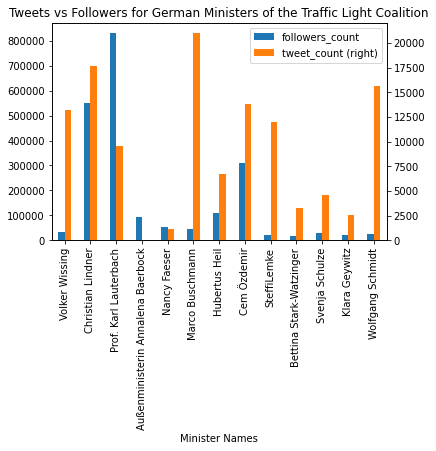

In [4]:
# Some visualization
tweet_ratio_plt = minister_df.plot(
    kind="bar",
    x="name",
    y=["followers_count", "tweet_count"],
    secondary_y="tweet_count",
)
tweet_ratio_plt.set_title(
    "Tweets vs Followers for German Ministers of the Traffic Light Coalition"
)
tweet_ratio_plt.set_xlabel("Minister Names")
plt.show()

In [5]:
party_stats_df = (
    minister_df.groupby(by=["party"])["followers_count", "tweet_count"]
    .mean()
    .sort_values(by=["followers_count", "tweet_count"], ascending=[False, True])
)
party_stats_df

/var/folders/n6/gc1kg4891tzd041w9shtbb_c0000gn/T/ipykernel_47412/2881319713.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  minister_df.groupby(by=["party"])["followers_count", "tweet_count"]


,followers_count,tweet_count
party,,
spd,178299.000000,6680.000000
fdp,160475.750000,13774.750000
gruene,141616.333333,8625.666667


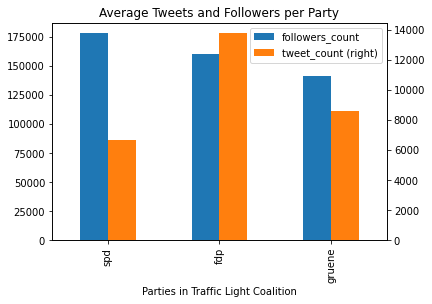

In [6]:
party_stats_plt = party_stats_df.plot(
    kind="bar", y=["followers_count", "tweet_count"], secondary_y="tweet_count"
)
party_stats_plt.set_title("Average Tweets and Followers per Party")
party_stats_plt.set_xlabel("Parties in Traffic Light Coalition")
plt.show()

In [ ]:
all_tweets = []

minister_twitter_identifiers = minister_df[["id", "name"]].values.tolist()
for user_id, user_name in minister_twitter_identifiers:
    user_tweets = twg.fetch_user_tweets(
        user_id=user_id, user_name=user_name
    )
    all_tweets.extend(user_tweets)

print(f"fetched {len(all_tweets)} tweets in total.")
#export_container_to_csv(container=all_tweets, path="data/minister_tweets.csv")

INFO [user Volker Wissing ✅]: Fetched 10 tweets.
INFO [user Volker Wissing ✅]: Fetched 10 tweets.
INFO [user Volker Wissing ✅]: Fetched 10 tweets.
INFO [user Volker Wissing ✅]: Fetched 10 tweets.
INFO [user Volker Wissing ✅]: Fetched 10 tweets.
INFO [user Volker Wissing ✅]: Fetched 10 tweets.
INFO [user Volker Wissing ✅]: Fetched 10 tweets.
INFO [user Volker Wissing ✅]: Fetched 10 tweets.
INFO [user Volker Wissing ✅]: Fetched 10 tweets.
INFO [user Volker Wissing ✅]: Fetched 10 tweets.
INFO [user Volker Wissing ✅]: Fetched 10 tweets.
INFO [user Christian Lindner ✅]: Fetched 10 tweets.
INFO [user Christian Lindner ✅]: Fetched 10 tweets.
INFO [user Christian Lindner ✅]: Fetched 10 tweets.
INFO [user Christian Lindner ✅]: Fetched 10 tweets.
INFO [user Christian Lindner ✅]: Fetched 10 tweets.
INFO [user Christian Lindner ✅]: Fetched 10 tweets.
INFO [user Christian Lindner ✅]: Fetched 10 tweets.
INFO [user Christian Lindner ✅]: Fetched 10 tweets.
INFO [user Christian Lindner ✅]: Fetched 10 t